<a href="https://colab.research.google.com/github/Tirta2241720045/PCVK_Ganjil_2024/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama: Tirta Nurrochman Bintang Prawira
# NIM: 2241720045
# Kelas: TI-3A
# No Absen: 27

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Langkah 1 - Import Library

## Langkah 2 - Pra Pengolahan Data

## Langkah 3 - Pembuatan Model CNN

## Langkah 4 - Fit CNN

# Langkah 5 Monitoring Hasil

## Langkah 6 - Prediksi dengan 1 Citra

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 605ms/step - accuracy: 0.3984 - loss: 1.2224 - val_accuracy: 0.3385 - val_loss: 1.0965
Epoch 2/100


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3385 - val_loss: 1.0965
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - accuracy: 0.4167 - loss: 1.1060 - val_accuracy: 0.3177 - val_loss: 1.0980
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3177 - val_loss: 1.0980
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 0.3229 - loss: 1.1604 - val_accuracy: 0.3177 - val_loss: 1.0909
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3177 - val_loss: 1.0909
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - accuracy: 0.5052 - loss: 1.0335 - val_accuracy: 0.3333 - val_loss: 1.0927
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3333 - val_loss: 1.0927
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step - accuracy: 0.3047 - loss: 1.1035 - val_acc

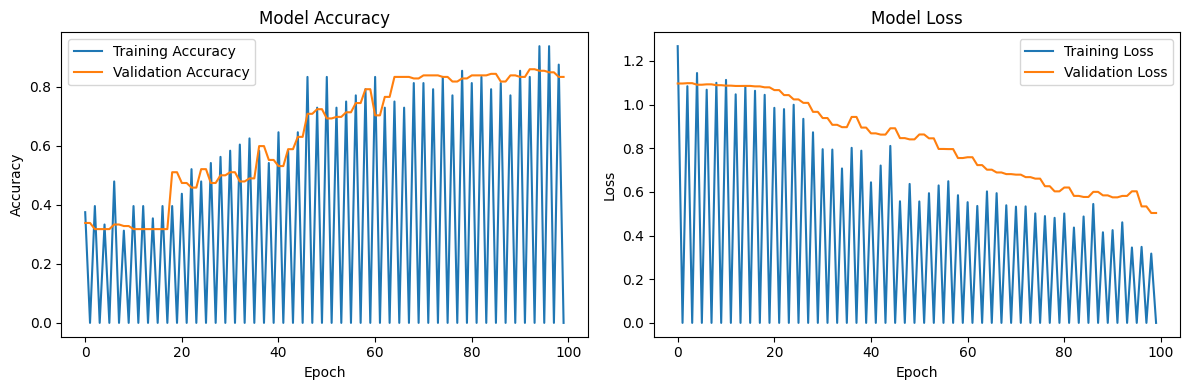

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8473 - loss: 0.5090

Test accuracy: 0.8333


In [4]:
import os
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Tentukan direktori dataset
dataset_dir = '/content/drive/MyDrive/dataset/Minggu12/Dataset_Daging_Hewan_Ternak/Training'

# Inisialisasi variabel untuk menyimpan data gambar dan label
X = []
Z = []

# Daftar kelas yang digunakan
classes = ['Ayam', 'Sapi', 'Kambing']

# Membaca data gambar dan label
for label in classes:
    folder_path = os.path.join(dataset_dir, label)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:  # Memastikan gambar berhasil dibaca
            img = cv2.resize(img, (224, 224))
            X.append(img)
            Z.append(label)

# Mengkonversi ke array numpy
X = np.array(X)
Z = np.array(Z)

# Label encoding
le = LabelEncoder()
Y = le.fit_transform(Z)
Y = to_categorical(Y, 3)

# Normalisasi data gambar
X = X / 255.0

# Membagi data menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Menghitung jumlah batch yang benar
batch_size = 16
steps_per_epoch = len(x_train) // batch_size

# Membangun model dengan arsitektur yang lebih sesuai
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Dense Layers
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Melatih model
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),  # Menggunakan ImageDataGenerator untuk augmentasi data
    steps_per_epoch=steps_per_epoch,
    epochs=100,
    validation_data=(x_test, y_test),
    verbose=1
)

# Plot hasil training
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluasi model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_accuracy:.4f}')


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


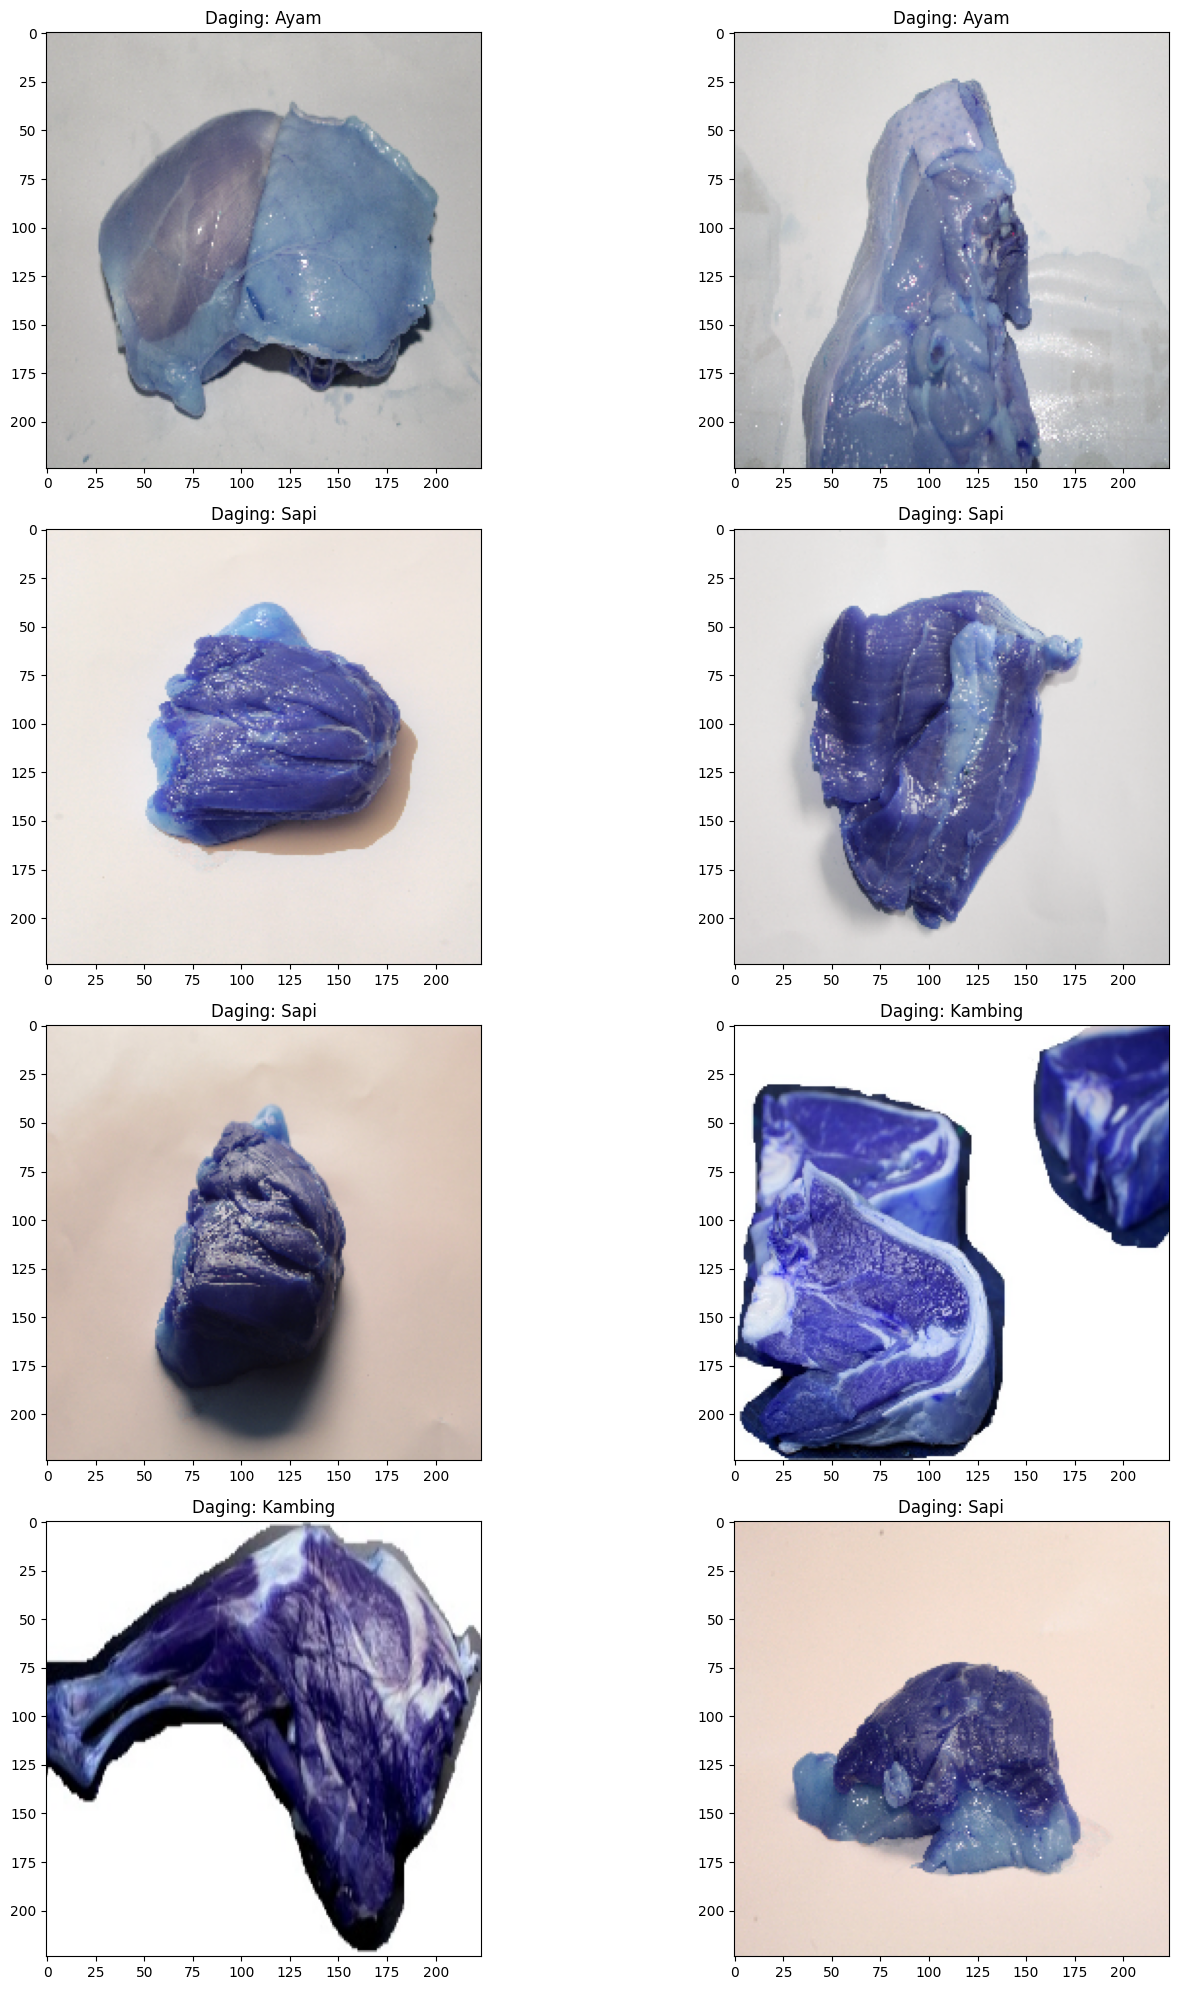

In [5]:
# Melakukan prediksi dengan citra uji
pred = model.predict(x_test)
pred_digits = np.argmax(pred, axis=1)

# Mengambil gambar yang diprediksi dengan benar
i = 0
prop_class = []
mis_class = []

for i in range(len(y_test)):
    if(np.argmax(y_test[i]) == pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class) == 8):
        break

i = 0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i]) == pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class) == 8):
        break

# Menampilkan gambar yang diprediksi dengan benar
count = 0
fig, ax = plt.subplots(4, 2)
fig.set_size_inches(20, 20)
for i in range(4):
    for j in range(2):
        ax[i, j].imshow(x_test[prop_class[count]])
        ax[i, j].set_title(f'Daging: {le.inverse_transform([pred_digits[prop_class[count]]])[0]}')
        plt.tight_layout()
        count += 1
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


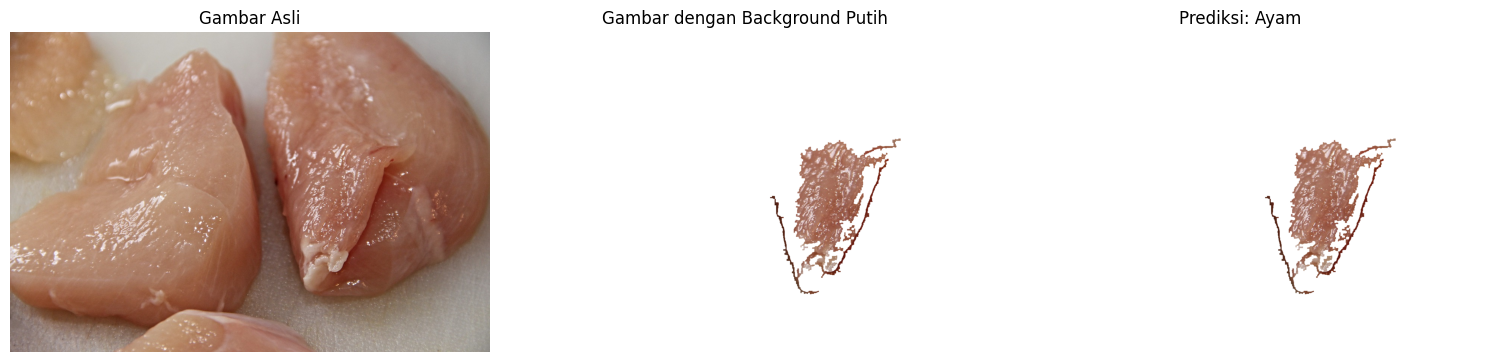

Probabilitas Prediksi:
Ayam: 82.73%
Kambing: 3.16%
Sapi: 14.11%


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
single_img_path = '/content/drive/MyDrive/dataset/Minggu12/Dataset_Daging_Hewan_Ternak/single_prediction/object1.jpg'
single_img = cv2.imread(single_img_path)

# Mengubah warna dari BGR ke RGB
single_img_rgb = cv2.cvtColor(single_img, cv2.COLOR_BGR2RGB)

# Konversi ke grayscale
gray = cv2.cvtColor(single_img, cv2.COLOR_BGR2GRAY)

# Gaussian Blur untuk mengurangi noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Threshold adaptif untuk background removal
thresh = cv2.adaptiveThreshold(
    blurred,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV,
    11,
    2
)

# Morfologi untuk membersihkan mask
kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)

# Cari kontur terbesar (objek utama)
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
main_contour = max(contours, key=cv2.contourArea)

# Buat mask akhir
final_mask = np.zeros(gray.shape, dtype=np.uint8)
cv2.drawContours(final_mask, [main_contour], 0, 255, -1)

# Gabungkan mask dengan gambar asli
result = cv2.bitwise_and(single_img_rgb, single_img_rgb, mask=final_mask)

# Tambahkan background putih
white_background = np.ones_like(single_img_rgb) * 255
white_background[final_mask > 0] = result[final_mask > 0]

# Resize gambar
single_img_resized = cv2.resize(white_background, (224, 224))

# Normalisasi
single_img_normalized = single_img_resized / 255.0

# Tambahkan dimensi batch
single_img_input = np.expand_dims(single_img_normalized, axis=0)

# Prediksi
prediction = model.predict(single_img_input)
predicted_class = np.argmax(prediction)
class_name = le.inverse_transform([predicted_class])[0]

# Tampilkan gambar
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(single_img_rgb)
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(white_background)
plt.title('Gambar dengan Background Putih')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(white_background)
plt.title(f'Prediksi: {class_name}')
plt.axis('off')

plt.tight_layout()
plt.show()

# Cetak probabilitas prediksi
print("Probabilitas Prediksi:")
for i, prob in enumerate(prediction[0]):
    print(f"{le.inverse_transform([i])[0]}: {prob*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


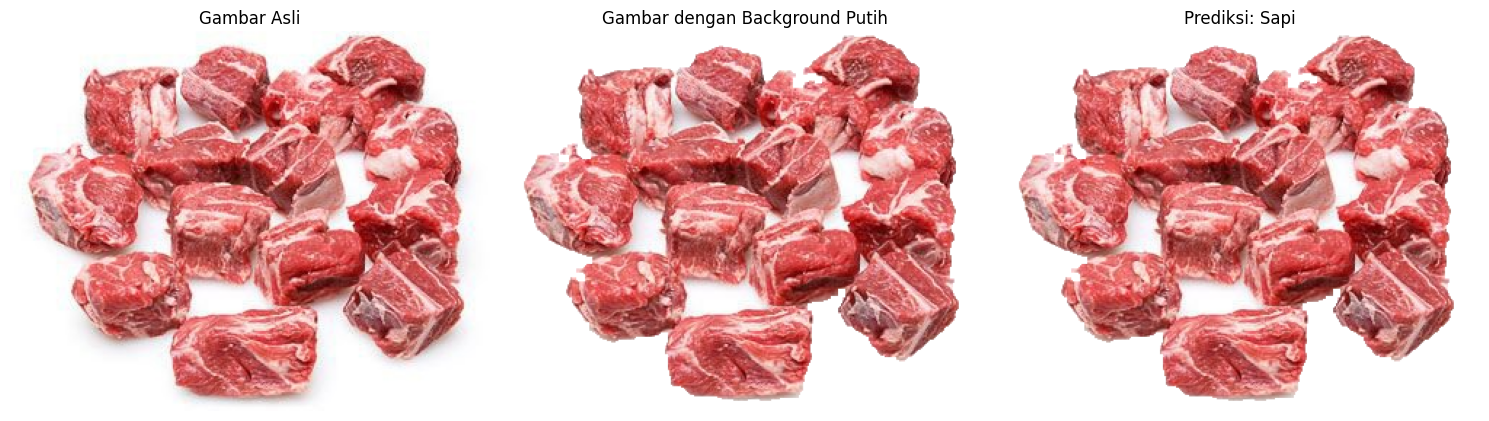

Probabilitas Prediksi:
Ayam: 15.88%
Kambing: 27.12%
Sapi: 56.99%


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
single_img_path = '/content/drive/MyDrive/dataset/Minggu12/Dataset_Daging_Hewan_Ternak/single_prediction/object2.jpg'
single_img = cv2.imread(single_img_path)

# Mengubah warna dari BGR ke RGB
single_img_rgb = cv2.cvtColor(single_img, cv2.COLOR_BGR2RGB)

# Konversi ke grayscale
gray = cv2.cvtColor(single_img, cv2.COLOR_BGR2GRAY)

# Gaussian Blur untuk mengurangi noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Threshold adaptif untuk background removal
thresh = cv2.adaptiveThreshold(
    blurred,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV,
    11,
    2
)

# Morfologi untuk membersihkan mask
kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)

# Cari kontur terbesar (objek utama)
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
main_contour = max(contours, key=cv2.contourArea)

# Buat mask akhir
final_mask = np.zeros(gray.shape, dtype=np.uint8)
cv2.drawContours(final_mask, [main_contour], 0, 255, -1)

# Gabungkan mask dengan gambar asli
result = cv2.bitwise_and(single_img_rgb, single_img_rgb, mask=final_mask)

# Tambahkan background putih
white_background = np.ones_like(single_img_rgb) * 255
white_background[final_mask > 0] = result[final_mask > 0]

# Resize gambar
single_img_resized = cv2.resize(white_background, (224, 224))

# Normalisasi
single_img_normalized = single_img_resized / 255.0

# Tambahkan dimensi batch
single_img_input = np.expand_dims(single_img_normalized, axis=0)

# Prediksi
prediction = model.predict(single_img_input)
predicted_class = np.argmax(prediction)
class_name = le.inverse_transform([predicted_class])[0]

# Tampilkan gambar
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(single_img_rgb)
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(white_background)
plt.title('Gambar dengan Background Putih')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(white_background)
plt.title(f'Prediksi: {class_name}')
plt.axis('off')

plt.tight_layout()
plt.show()

# Cetak probabilitas prediksi
print("Probabilitas Prediksi:")
for i, prob in enumerate(prediction[0]):
    print(f"{le.inverse_transform([i])[0]}: {prob*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


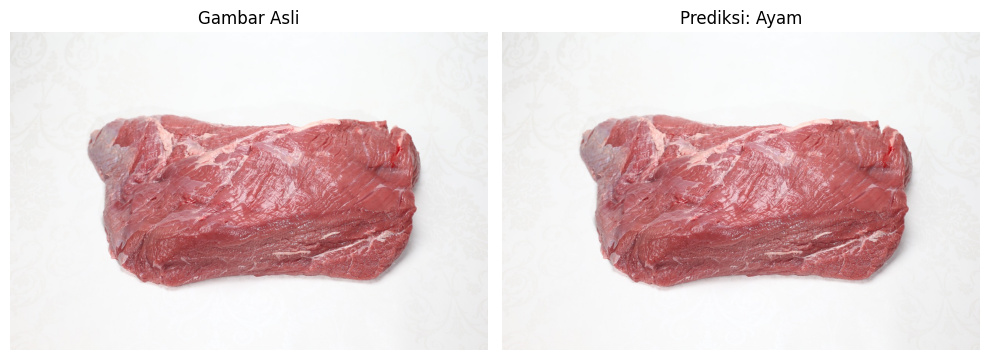

Probabilitas Prediksi:
Ayam: 72.18%
Kambing: 5.02%
Sapi: 22.79%


In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
single_img_path = '/content/drive/MyDrive/dataset/Minggu12/Dataset_Daging_Hewan_Ternak/single_prediction/object3.jpg'
single_img = cv2.imread(single_img_path)

# Mengubah warna dari BGR ke RGB
single_img_rgb = cv2.cvtColor(single_img, cv2.COLOR_BGR2RGB)

# Resize gambar
single_img_resized = cv2.resize(single_img_rgb, (224, 224))

# Normalisasi
single_img_normalized = single_img_resized / 255.0

# Tambahkan dimensi batch
single_img_input = np.expand_dims(single_img_normalized, axis=0)

# Prediksi
prediction = model.predict(single_img_input)
predicted_class = np.argmax(prediction)
class_name = le.inverse_transform([predicted_class])[0]

# Tampilkan gambar dan hasil prediksi
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(single_img_rgb)
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(single_img_rgb)
plt.title(f'Prediksi: {class_name}')
plt.axis('off')

plt.tight_layout()
plt.show()

# Cetak probabilitas prediksi
print("Probabilitas Prediksi:")
for i, prob in enumerate(prediction[0]):
    print(f"{le.inverse_transform([i])[0]}: {prob*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


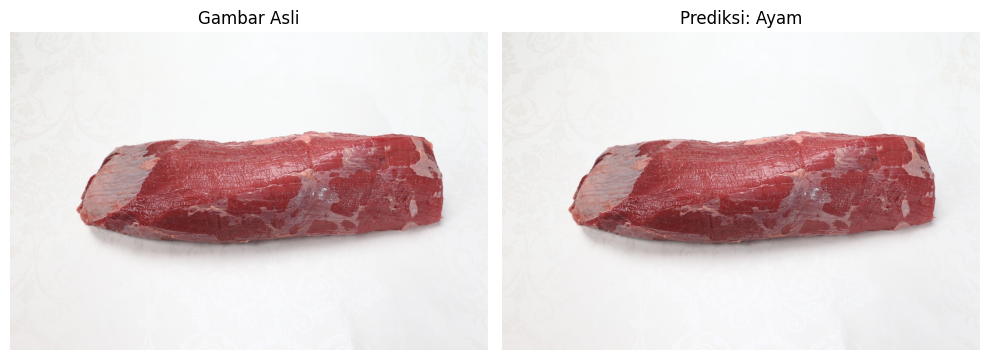

Probabilitas Prediksi:
Ayam: 60.26%
Kambing: 5.67%
Sapi: 34.07%


In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
single_img_path = '/content/drive/MyDrive/dataset/Minggu12/Dataset_Daging_Hewan_Ternak/single_prediction/object4.jpg'
single_img = cv2.imread(single_img_path)

# Mengubah warna dari BGR ke RGB
single_img_rgb = cv2.cvtColor(single_img, cv2.COLOR_BGR2RGB)

# Resize gambar
single_img_resized = cv2.resize(single_img_rgb, (224, 224))

# Normalisasi
single_img_normalized = single_img_resized / 255.0

# Tambahkan dimensi batch
single_img_input = np.expand_dims(single_img_normalized, axis=0)

# Prediksi
prediction = model.predict(single_img_input)
predicted_class = np.argmax(prediction)
class_name = le.inverse_transform([predicted_class])[0]

# Tampilkan gambar dan hasil prediksi
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(single_img_rgb)
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(single_img_rgb)
plt.title(f'Prediksi: {class_name}')
plt.axis('off')

plt.tight_layout()
plt.show()

# Cetak probabilitas prediksi
print("Probabilitas Prediksi:")
for i, prob in enumerate(prediction[0]):
    print(f"{le.inverse_transform([i])[0]}: {prob*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


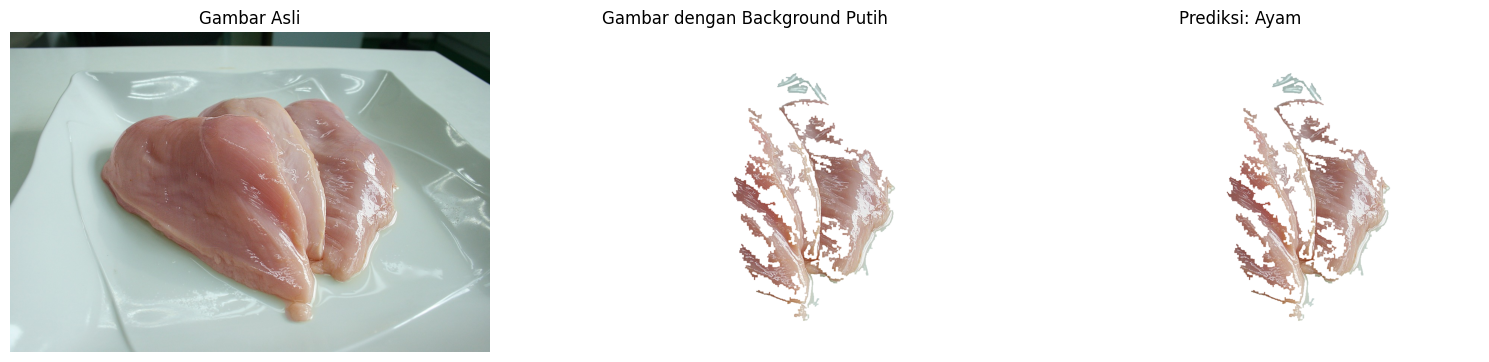

Probabilitas Prediksi:
Ayam: 83.26%
Kambing: 3.04%
Sapi: 13.70%


In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
single_img_path = '/content/drive/MyDrive/dataset/Minggu12/Dataset_Daging_Hewan_Ternak/single_prediction/object5.jpg'
single_img = cv2.imread(single_img_path)

# Mengubah warna dari BGR ke RGB
single_img_rgb = cv2.cvtColor(single_img, cv2.COLOR_BGR2RGB)

# Konversi ke grayscale
gray = cv2.cvtColor(single_img, cv2.COLOR_BGR2GRAY)

# Gaussian Blur untuk mengurangi noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Threshold adaptif untuk background removal
thresh = cv2.adaptiveThreshold(
    blurred,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV,
    11,
    2
)

# Morfologi untuk membersihkan mask
kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)

# Cari kontur terbesar (objek utama)
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
main_contour = max(contours, key=cv2.contourArea)

# Buat mask akhir
final_mask = np.zeros(gray.shape, dtype=np.uint8)
cv2.drawContours(final_mask, [main_contour], 0, 255, -1)

# Gabungkan mask dengan gambar asli
result = cv2.bitwise_and(single_img_rgb, single_img_rgb, mask=final_mask)

# Tambahkan background putih
white_background = np.ones_like(single_img_rgb) * 255
white_background[final_mask > 0] = result[final_mask > 0]

# Resize gambar
single_img_resized = cv2.resize(white_background, (224, 224))

# Normalisasi
single_img_normalized = single_img_resized / 255.0

# Tambahkan dimensi batch
single_img_input = np.expand_dims(single_img_normalized, axis=0)

# Prediksi
prediction = model.predict(single_img_input)
predicted_class = np.argmax(prediction)
class_name = le.inverse_transform([predicted_class])[0]

# Tampilkan gambar
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(single_img_rgb)
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(white_background)
plt.title('Gambar dengan Background Putih')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(white_background)
plt.title(f'Prediksi: {class_name}')
plt.axis('off')

plt.tight_layout()
plt.show()

# Cetak probabilitas prediksi
print("Probabilitas Prediksi:")
for i, prob in enumerate(prediction[0]):
    print(f"{le.inverse_transform([i])[0]}: {prob*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


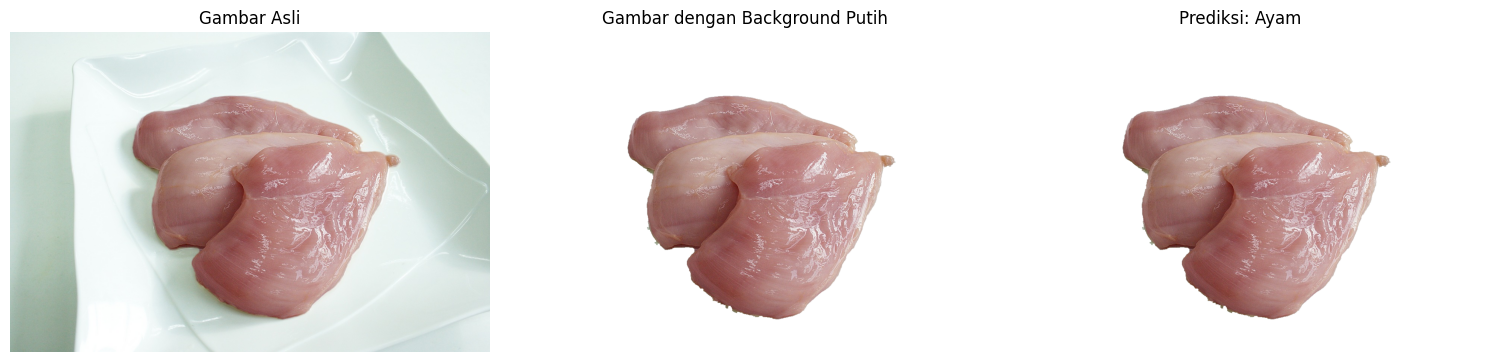

Probabilitas Prediksi:
Ayam: 74.34%
Kambing: 3.87%
Sapi: 21.78%


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
single_img_path = '/content/drive/MyDrive/dataset/Minggu12/Dataset_Daging_Hewan_Ternak/single_prediction/object6.jpg'
single_img = cv2.imread(single_img_path)

# Mengubah warna dari BGR ke RGB
single_img_rgb = cv2.cvtColor(single_img, cv2.COLOR_BGR2RGB)

# Konversi ke grayscale
gray = cv2.cvtColor(single_img, cv2.COLOR_BGR2GRAY)

# Gaussian Blur untuk mengurangi noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Threshold adaptif untuk background removal
thresh = cv2.adaptiveThreshold(
    blurred,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV,
    11,
    2
)

# Morfologi untuk membersihkan mask
kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)

# Cari kontur terbesar (objek utama)
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
main_contour = max(contours, key=cv2.contourArea)

# Buat mask akhir
final_mask = np.zeros(gray.shape, dtype=np.uint8)
cv2.drawContours(final_mask, [main_contour], 0, 255, -1)

# Gabungkan mask dengan gambar asli
result = cv2.bitwise_and(single_img_rgb, single_img_rgb, mask=final_mask)

# Tambahkan background putih
white_background = np.ones_like(single_img_rgb) * 255
white_background[final_mask > 0] = result[final_mask > 0]

# Resize gambar
single_img_resized = cv2.resize(white_background, (224, 224))

# Normalisasi
single_img_normalized = single_img_resized / 255.0

# Tambahkan dimensi batch
single_img_input = np.expand_dims(single_img_normalized, axis=0)

# Prediksi
prediction = model.predict(single_img_input)
predicted_class = np.argmax(prediction)
class_name = le.inverse_transform([predicted_class])[0]

# Tampilkan gambar
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(single_img_rgb)
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(white_background)
plt.title('Gambar dengan Background Putih')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(white_background)
plt.title(f'Prediksi: {class_name}')
plt.axis('off')

plt.tight_layout()
plt.show()

# Cetak probabilitas prediksi
print("Probabilitas Prediksi:")
for i, prob in enumerate(prediction[0]):
    print(f"{le.inverse_transform([i])[0]}: {prob*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


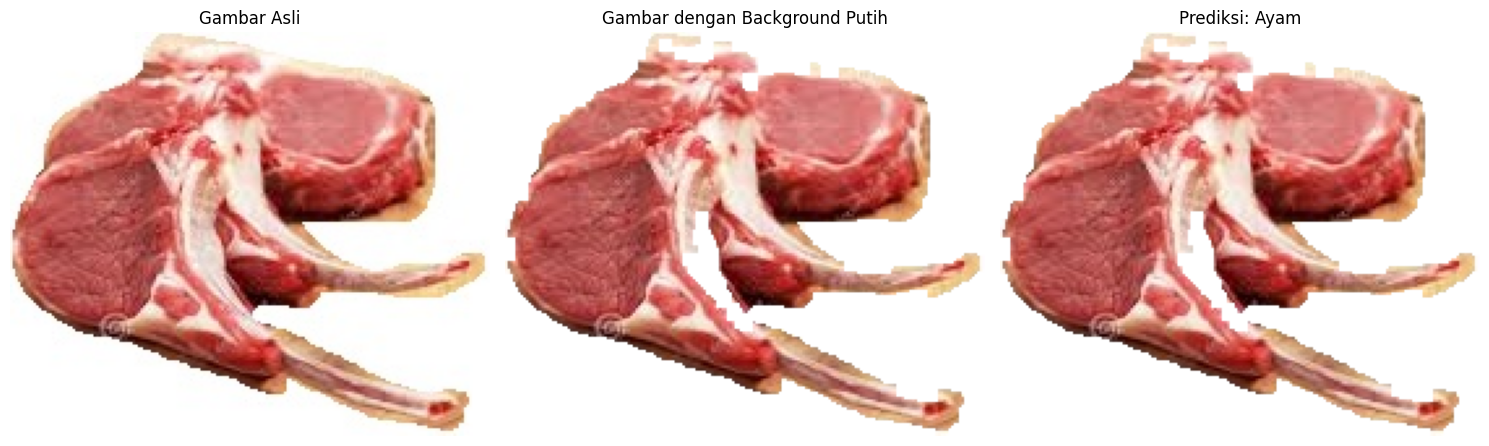

Probabilitas Prediksi:
Ayam: 47.40%
Kambing: 14.72%
Sapi: 37.88%


In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
single_img_path = '/content/drive/MyDrive/dataset/Minggu12/Dataset_Daging_Hewan_Ternak/Testing/Kambing/Kambing (100).jpg'
single_img = cv2.imread(single_img_path)

# Mengubah warna dari BGR ke RGB
single_img_rgb = cv2.cvtColor(single_img, cv2.COLOR_BGR2RGB)

# Konversi ke grayscale
gray = cv2.cvtColor(single_img, cv2.COLOR_BGR2GRAY)

# Gaussian Blur untuk mengurangi noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Threshold adaptif untuk background removal
thresh = cv2.adaptiveThreshold(
    blurred,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV,
    11,
    2
)

# Morfologi untuk membersihkan mask
kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)

# Cari kontur terbesar (objek utama)
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
main_contour = max(contours, key=cv2.contourArea)

# Buat mask akhir
final_mask = np.zeros(gray.shape, dtype=np.uint8)
cv2.drawContours(final_mask, [main_contour], 0, 255, -1)

# Gabungkan mask dengan gambar asli
result = cv2.bitwise_and(single_img_rgb, single_img_rgb, mask=final_mask)

# Tambahkan background putih
white_background = np.ones_like(single_img_rgb) * 255
white_background[final_mask > 0] = result[final_mask > 0]

# Resize gambar
single_img_resized = cv2.resize(white_background, (224, 224))

# Normalisasi
single_img_normalized = single_img_resized / 255.0

# Tambahkan dimensi batch
single_img_input = np.expand_dims(single_img_normalized, axis=0)

# Prediksi
prediction = model.predict(single_img_input)
predicted_class = np.argmax(prediction)
class_name = le.inverse_transform([predicted_class])[0]

# Tampilkan gambar
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(single_img_rgb)
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(white_background)
plt.title('Gambar dengan Background Putih')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(white_background)
plt.title(f'Prediksi: {class_name}')
plt.axis('off')

plt.tight_layout()
plt.show()

# Cetak probabilitas prediksi
print("Probabilitas Prediksi:")
for i, prob in enumerate(prediction[0]):
    print(f"{le.inverse_transform([i])[0]}: {prob*100:.2f}%")